# Explore here

In [2]:
# Analisis Exploratorio de Datos

# Paso 1 - Cargar base de Datos

import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Paso 2 - Exploracion y limpieza de Datos

# Obtener las dimensiones

data.shape

(48895, 16)

In [3]:
# Obtener información sobre tipos de datos y valores no nulos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# Existen un total de 48895 filas (en este caso, propiedades) y 16 columnas, de entre las que encontramos el objetivo o clase a predecir, price.
# La variable last_review y review_por_month solo tiene 38.843 instancias con valores, por lo que contendría más de 10.000 valores nulos. 
# El resto de variables cuentan con valor.
# Los datos cuentan con 10 características numéricas y 6 características categóricas.

In [5]:
# Eliminar duplicados

data.drop("id", axis = 1).duplicated().sum()

0

En este caso, no encontramos ningún valor duplicado.

In [5]:
# Conocer si existen valores nulos

data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Eliminar info irrelevante

data.drop(["name", "host_name"], axis = 1, inplace = True)
data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
# Paso 3: Análisis de variables univariante

import matplotlib.pyplot as plt 
import seaborn as sns

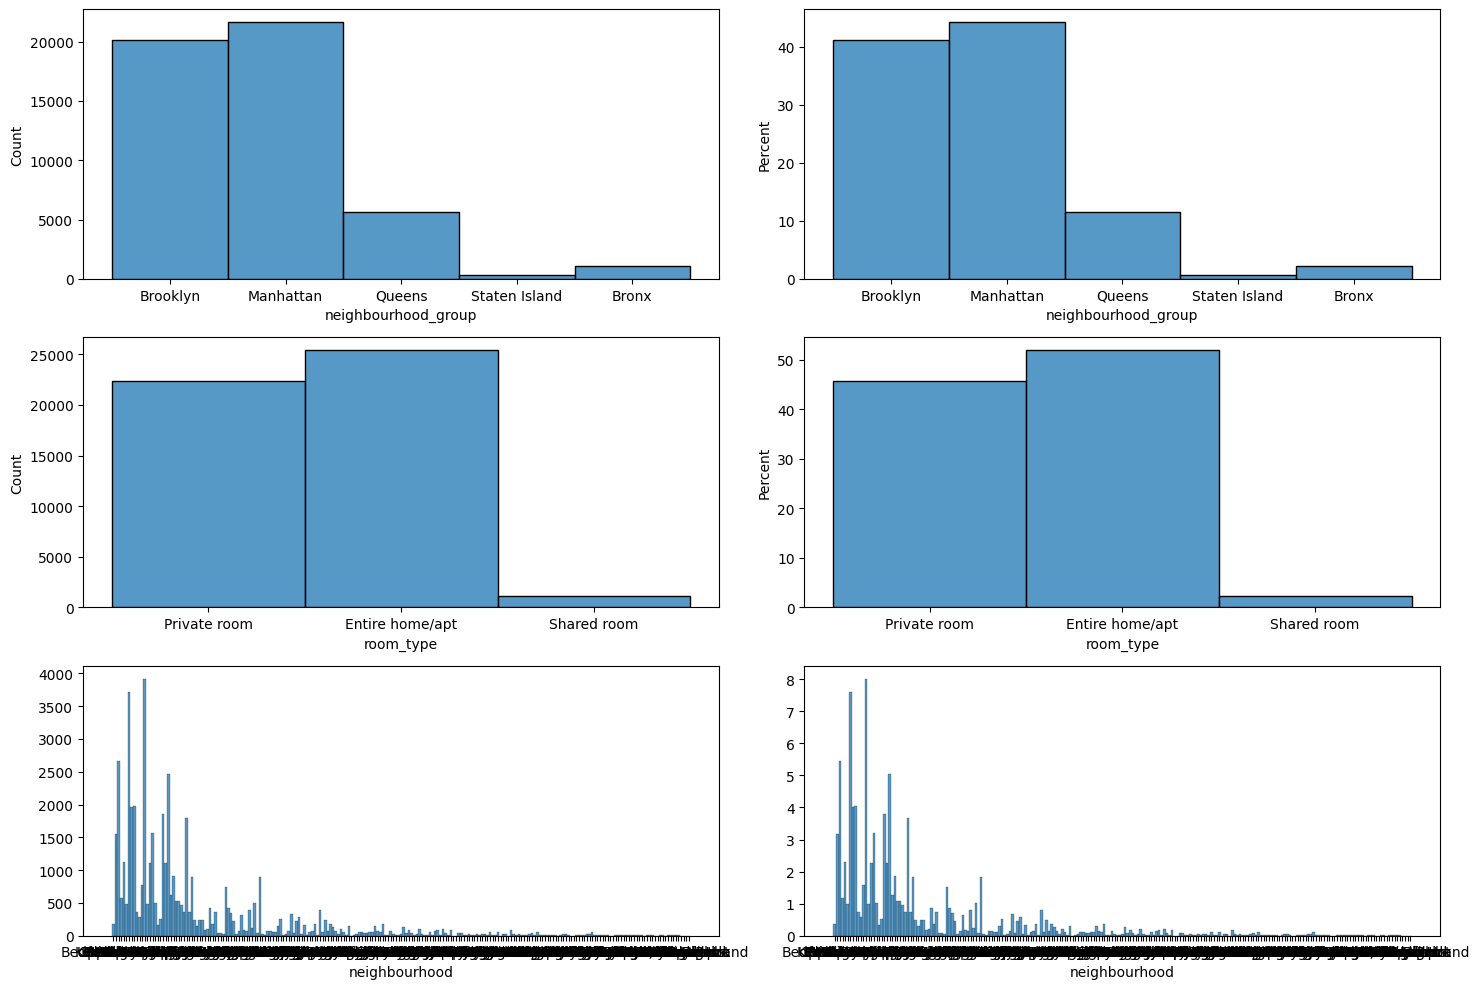

In [10]:
fig, axis = plt.subplots(3, 2, figsize = (15, 10))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = data, x = "neighbourhood_group")
sns.histplot(ax = axis[0, 1], data = data, x = "neighbourhood_group", stat="percent")
sns.histplot(ax = axis[1, 0], data = data, x = "room_type")
sns.histplot(ax = axis[1, 1], data = data, x = "room_type", stat="percent")
sns.histplot(ax = axis[2, 0], data = data, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[2, 1], data = data, x = "neighbourhood", stat="percent").set(ylabel = None)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [23]:
data['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

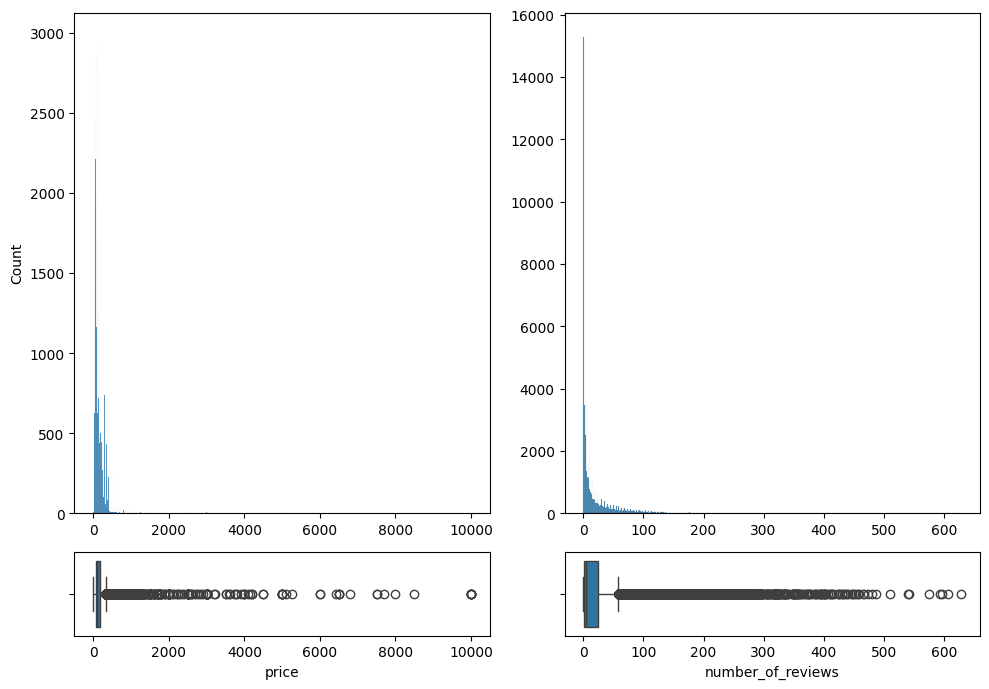

In [11]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "price")
sns.histplot(ax = axis[0, 1], data = data, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "number_of_reviews")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [12]:
data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [13]:
data.loc[data.price==10000]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83


In [14]:
data.loc[data.price==0]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


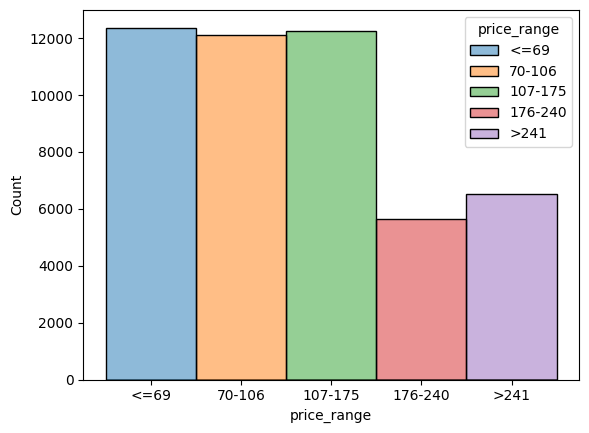

In [15]:
# Análisis sobre variables numéricas

data['price_range'] = pd.cut(data['price'],bins=[0,69,106,175,240, float('inf')],
                labels=['<=69', '70-106', '107-175','176-240','>241'],include_lowest=True)

sns.histplot(x='price_range',hue='price_range',data=data)

plt.show()

In [21]:
# Factorizacion

data["room_type_f"] = pd.factorize(data["room_type"])[0]
data["neighbourhood_group_f"] = pd.factorize(data["neighbourhood_group"])[0]
data["neighbourhood_f"] = pd.factorize(data["neighbourhood"])[0]
data['number_of_reviews_f']=pd.factorize(data["number_of_reviews"])[0]
data['minimum_nights_f']=pd.factorize(data["minimum_nights"])[0]
data['availability_365_f']=pd.factorize(data["availability_365"])[0]
# data['Country_f']=pd.factorize(data["Country"])[0]
# data['C_f']=pd.factorize(data["C"])[0]

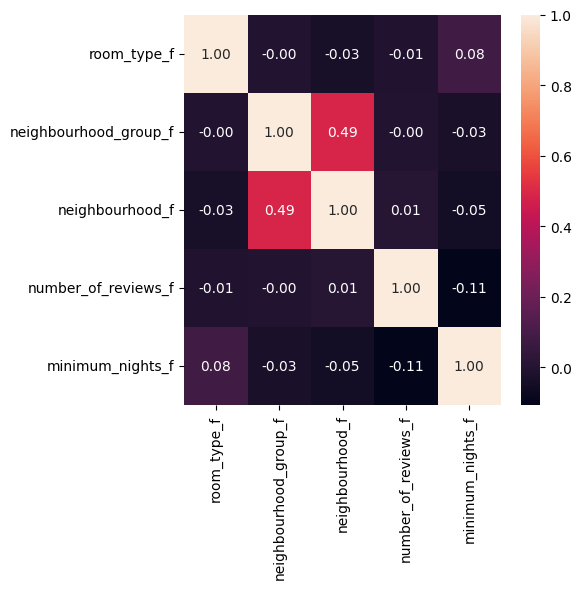

In [22]:
fig, axis = plt.subplots(figsize = (6, 6))
matriz_corr=data[["room_type_f", "neighbourhood_group_f", "neighbourhood_f", "number_of_reviews_f", 'minimum_nights_f']].corr()
#print(matriz_corr)
sns.heatmap(matriz_corr, annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [24]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  int64   
 1   host_id                         48895 non-null  int64   
 2   neighbourhood_group             48895 non-null  object  
 3   neighbourhood                   48895 non-null  object  
 4   latitude                        48895 non-null  float64 
 5   longitude                       48895 non-null  float64 
 6   room_type                       48895 non-null  object  
 7   price                           48895 non-null  int64   
 8   minimum_nights                  48895 non-null  int64   
 9   number_of_reviews               48895 non-null  int64   
 10  last_review                     38843 non-null  object  
 11  reviews_per_month               38843 non-null  float64 
 12  calculated_host_li

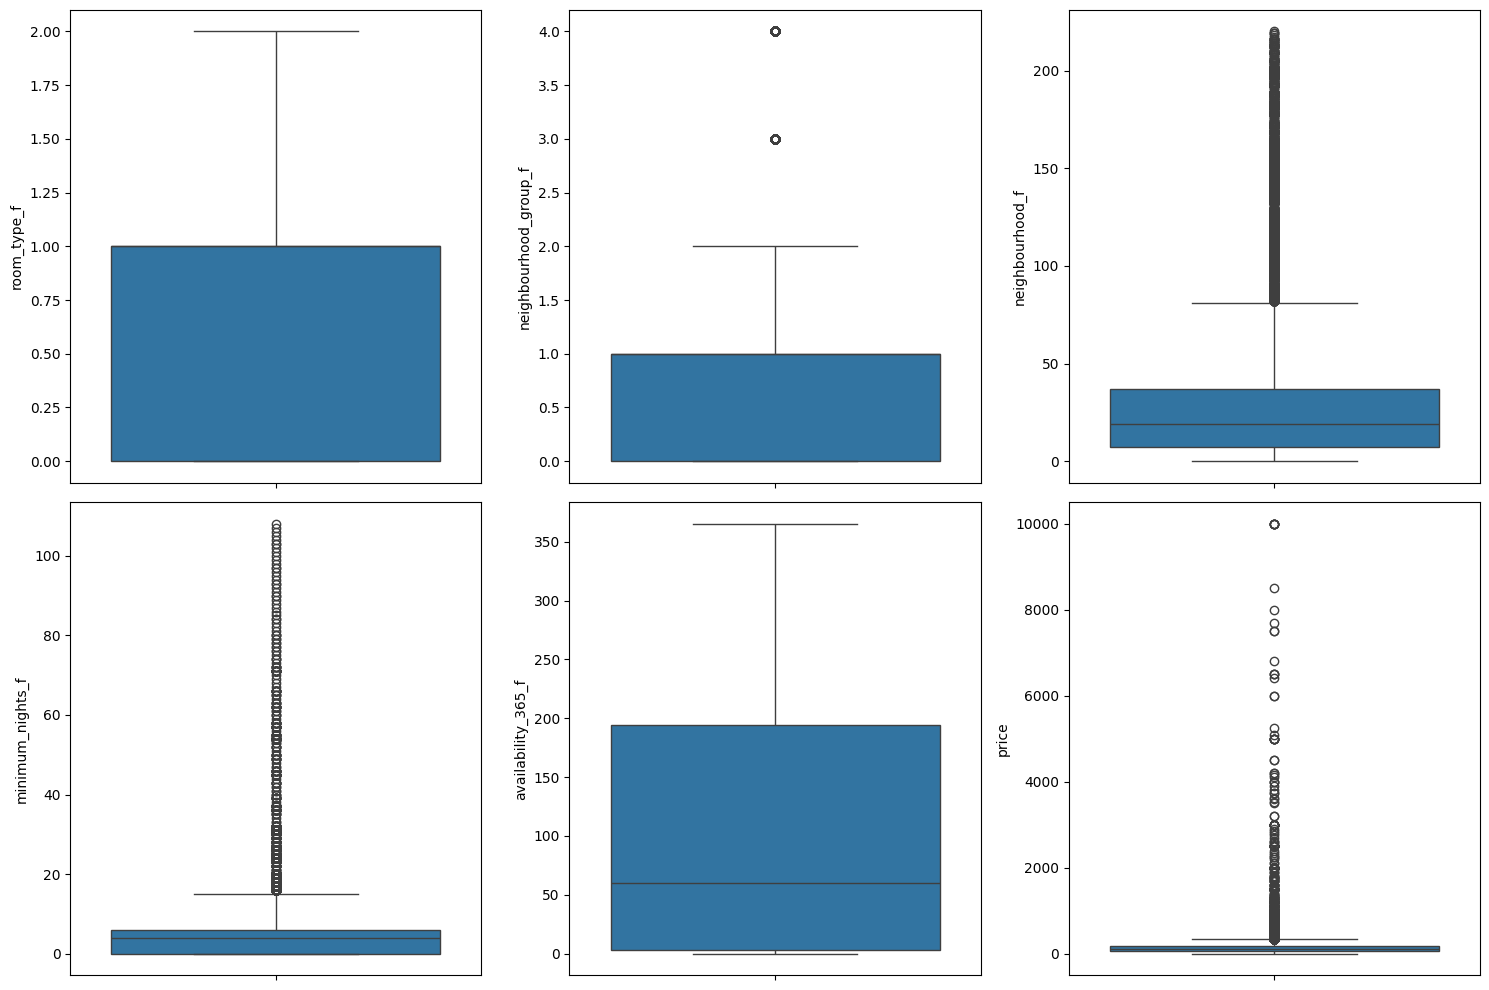

In [26]:
# Revision de Datos Atipicos

fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data, y = "room_type_f")
sns.boxplot(ax = axis[0, 1], data = data, y = "neighbourhood_group_f")
sns.boxplot(ax = axis[0, 2], data = data, y = "neighbourhood_f")
sns.boxplot(ax = axis[1, 0], data = data, y = "minimum_nights_f")
sns.boxplot(ax = axis[1, 1], data = data, y = "availability_365_f")
sns.boxplot(ax = axis[1, 2], data = data, y = "price")
# sns.boxplot(ax = axis[2, 0], data = data, y = "Race_f")
# sns.boxplot(ax = axis[2, 1], data = data, y = "Sex_f")
# sns.boxplot(ax = axis[2, 2], data = data, y = "Country_f")
# sns.boxplot(ax = axis[3, 0], data = data, y = "Hpw")

plt.tight_layout()
plt.show()

In [ ]:
# Valores atipicos Age y Hpw